In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/ComputoCienciasUniandes/MetodosComputacionalesAvanzados/master/secciones/06.RegresionLineal/Cars93.csv

--2018-09-28 07:20:58--  https://raw.githubusercontent.com/ComputoCienciasUniandes/MetodosComputacionalesAvanzados/master/secciones/06.RegresionLineal/Cars93.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.4.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.4.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14870 (15K) [text/plain]
Saving to: ‘Cars93.csv.2’

Cars93.csv.2        100%[===================>]  14,52K  --.-KB/s    in 0,07s   

2018-09-28 07:20:59 (205 KB/s) - ‘Cars93.csv.2’ saved [14870/14870]



In [70]:
import sklearn.linear_model
from sklearn.model_selection import LeaveOneOut
from sklearn.linear_model import Lasso
data = pd.read_csv('Cars93.csv')
k = ['MPG.city', 'MPG.highway', 'EngineSize',    'Horsepower', 'RPM', 'Rev.per.mile',   'Fuel.tank.capacity', 'Passengers', 'Length',   'Wheelbase', 'Width', 'Turn.circle', 'Weight']

In [59]:
k

['MPG.city',
 'MPG.highway',
 'EngineSize',
 'Horsepower',
 'RPM',
 'Rev.per.mile',
 'Fuel.tank.capacity',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turn.circle',
 'Weight']

In [60]:
datos = data[k]
datos

,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Weight
0,25,31,1.8,140,6300,2890,13.2,5,177,102,68,37,2705
1,18,25,3.2,200,5500,2335,18.0,5,195,115,71,38,3560
2,20,26,2.8,172,5500,2280,16.9,5,180,102,67,37,3375
3,19,26,2.8,172,5500,2535,21.1,6,193,106,70,37,3405
4,22,30,3.5,208,5700,2545,21.1,4,186,109,69,39,3640
5,22,31,2.2,110,5200,2565,16.4,6,189,105,69,41,2880
6,19,28,3.8,170,4800,1570,18.0,6,200,111,74,42,3470
7,16,25,5.7,180,4000,1320,23.0,6,216,116,78,45,4105
8,19,27,3.8,170,4800,1690,18.8,5,198,108,73,41,3495
9,16,25,4.9,200,4100,1510,18.0,6,206,114,73,43,3620


In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
datos1 = datos.values
datos1
print(scaler.fit(datos1))
#print(scaler.mean_)
print(scaler.transform(datos1))

StandardScaler(copy=True, with_mean=True, with_std=True)
[[ 0.47131249  0.36092485 -0.84102206 ... -0.3661839  -0.61043588
  -0.62705456]
 [-0.78103212 -0.77051373  0.51586855 ...  0.43198257 -0.29850985
   0.83020814]
 [-0.42321938 -0.58194063  0.12818552 ... -0.63223939 -0.61043588
   0.51489399]
 ...
 [-0.78103212 -0.77051373  0.12818552 ... -0.89829488 -0.9223619
  -0.44809247]
 [-0.244313   -0.20479444 -0.35641827 ... -0.63223939 -0.61043588
  -0.14982233]
 [-0.42321938 -0.20479444 -0.25949751 ... -0.10012841 -0.29850985
   0.29332188]]


In [62]:
ndatos=(datos-datos.mean())/datos.std()
X

array([[2.500e+01, 3.100e+01, 1.800e+00, ..., 6.800e+01, 3.700e+01,
        2.705e+03],
       [1.800e+01, 2.500e+01, 3.200e+00, ..., 7.100e+01, 3.800e+01,
        3.560e+03],
       [2.000e+01, 2.600e+01, 2.800e+00, ..., 6.700e+01, 3.700e+01,
        3.375e+03],
       ...,
       [1.800e+01, 2.500e+01, 2.800e+00, ..., 6.600e+01, 3.600e+01,
        2.810e+03],
       [2.100e+01, 2.800e+01, 2.300e+00, ..., 6.700e+01, 3.700e+01,
        2.985e+03],
       [2.000e+01, 2.800e+01, 2.400e+00, ..., 6.900e+01, 3.800e+01,
        3.245e+03]])

In [57]:
Y0 = data['Price'].values
X0 = data[k].values
loo = LeaveOneOut()
n = loo.get_n_splits(X)
print(n)
for train_index, test_index in loo.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X0[train_index], X0[test_index]
    y_train, y_test = Y0[train_index], Y0[test_index]
    #print(X_train, X_test, y_train, y_test)


93


TypeError: plot() missing 1 required positional argument: 'title'

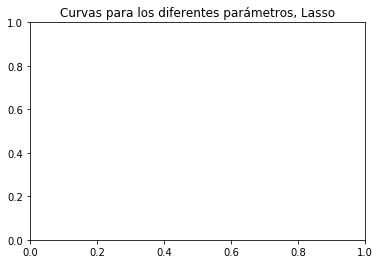

In [76]:
coef=np.zeros([len(k),10000])
Y = data['Price']
X = data[k]

alphas=np.linspace(1,3,10000)
for i in range(len(alphas)):
    sk_lasso=Lasso(alpha=alphas[i])
    sk_lasso.fit(X,Y)
    
    coef[:,i]=sk_lasso.coef_
    
    

#plt.plot(lambdas,coef[10,:])

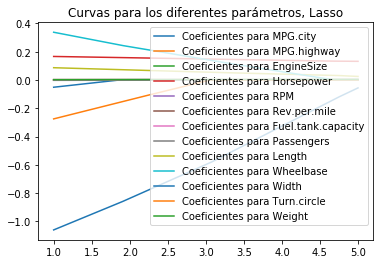

In [82]:
plt.figure()
plt.title("Curvas para los diferentes parámetros, Lasso")
def plot(arr, title):
    plt.plot(lambdas,arr, label = title)
for i in range(len(k)):
    plot(coef[i,:], "Coeficientes para {:s}".format(k[i]))

plt.legend(loc = 1)